# ABSTRACTO

El objetivo de este estudio es utilizar el dataset "DATOS ABIERTOS DE AIRBNB" para desarrollar un modelo predictivo que permita identificar la mejor zona para establecer un alquiler temporario en Airbnb, dadas ciertas características específicas del cliente.
Se busca crear un sistema que, basándose en las preferencias y requisitos del arrendador, pueda recomendar las áreas más adecuadas en términos de rentabilidad y satisfacción del cliente. Esto implica analizar una variedad de variables, como el tipo de propiedad, el precio, las comodidades ofrecidas y la demanda del mercado, para generar recomendaciones personalizadas y optimizar la experiencia en Airbnb.
Este enfoque está diseñado para proporcionar al host una solución más precisa y eficiente para aquellos que buscan maximizar el rendimiento de sus propiedades en el mercado de alquiler temporal.

# PREGUNTAS/HIPOTESIS:
a) ¿Cuál es el barrio más popular para alquilar una propiedad en Airbnb?
b) ¿Qué vecindario tiene la mejor calificación según el número de votos?
c) ¿Hay una diferencia significativa en los costos de alquiler entre barrios?
e) ¿Qué 'tipo de habitación' es el más popular entre los huéspedes de Airbnb?
f) ¿Cuál es la preferencia de tipo de habitación entre los dos barrios más populares?
g) ¿Cuál es la diferencia de precios entre una habitación privada y un departamento o casa completa en diferentes zonas de Brooklyn y Manhattan?
h) ¿Existe una diferencia promedio de precios entre una habitación privada y un casa/departamento completo?
i) ¿Existe una relación entre el precio y la cantidad de alquileres en los barrios mencionados? Es decir, ¿tiene la zona más barata más alquileres?
j) ¿Es necesario verificar la disponibilidad de la propiedad antes de realizar una reserva en Airbnb?
k) ¿Preferyen los huéspedes de Airbnb que las reservas sean instantáneas o que sean confirmadas con anticipación?

# LIBRERIAS:
    Importación de las librerias que utilizaremos.

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
from catboost import CatBoostClassifier
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

C:\Users\casal\miniconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\casal\miniconda3\lib\site-packages\numpy\.libs\libopenblas64__v0.3.21-gcc_10_3_0.dll
C:\Users\casal\miniconda3\lib\site-packages\numpy\.libs\libopenblas64__v0.3.23-246-g3d31191b-gcc_10_3_0.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


# Dataset
    Carga del dataset, si muestra y columnas que lo integran.

In [11]:
df= pd.read_csv('c:\\Users\\casal\\Desktop\\data\\Airbnb_Open_Data.csv', on_bad_lines='skip')

C:\Users\casal\AppData\Local\Temp\ipykernel_4652\2528756227.py:1: DtypeWarning: Columns (25) have mixed types. Specify dtype option on import or set low_memory=False.
  df= pd.read_csv('c:\\Users\\casal\\Desktop\\data\\Airbnb_Open_Data.csv', on_bad_lines='skip')


# Exploracion de datos

In [25]:
df.head(5)

,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license
0,1001254,Clean & quiet apt home by the park,80014485718,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,...,$193,10.0,9.0,10/19/2021,0.21,4.0,6.0,286.0,Clean up and treat the home the way you'd like...,NaN
1,1002102,Skylit Midtown Castle,52335172823,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,...,$28,30.0,45.0,5/21/2022,0.38,4.0,2.0,228.0,Pet friendly but please confirm with me if the...,NaN
2,1002403,THE VILLAGE OF HARLEM....NEW YORK !,78829239556,NaN,Elise,Manhattan,Harlem,40.80902,-73.94190,United States,...,$124,3.0,0.0,NaN,NaN,5.0,1.0,352.0,"I encourage you to use my kitchen, cooking and...",NaN
3,1002755,NaN,85098326012,unconfirmed,Garry,Brooklyn,Clinton Hill,40.68514,-73.95976,United States,...,$74,30.0,270.0,7/5/2019,4.64,4.0,1.0,322.0,NaN,NaN
4,1003689,Entire Apt: Spacious Studio/Loft by central park,92037596077,verified,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,United States,...,$41,10.0,9.0,11/19/2018,0.10,3.0,1.0,289.0,"Please no smoking in the house, porch or on th...",NaN


#### variables:
A continuación se describiran aquellas que parecen ser más importantes para el proyecto:

 * Neighbourhood group: Se refiere a los 5 distritos de Nueva York (Brooklyn, Manhattan, Staten Island, Queens, Bronx).,         
 * neighbourhood: Son los diferentes barrios que existen dentro de cada distrito.
 * room type: Se refiere a los distintos tipos de alquiler (habitación privada, habitación compartida, hotel, departamento completo).
 * price: Es el costo del alquiler por noche.
 * review rate number: Es la calificación que recibió cada alquiler.  

In [33]:
df.shape

(102595, 26)

In [137]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 102566 entries, 0 to 102594
Data columns (total 25 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   id                              102566 non-null  int64  
 1   NAME                            102318 non-null  object 
 2   host id                         102566 non-null  int64  
 3   host_identity_verified          102285 non-null  object 
 4   host name                       102162 non-null  object 
 5   neighbourhood group             102566 non-null  object 
 6   neighbourhood                   102550 non-null  object 
 7   lat                             102558 non-null  float64
 8   long                            102558 non-null  float64
 9   country                         102035 non-null  object 
 10  country code                    102436 non-null  object 
 11  instant_bookable                102462 non-null  object 
 12  cancellation_policy  

In [6]:
df.describe()

,id,host id,lat,long,Construction year,minimum nights,number of reviews,reviews per month,review rate number,calculated host listings count,availability 365
count,1.025950e+05,1.025950e+05,102587.000000,102587.000000,102381.000000,102187.000000,102412.000000,86716.000000,102269.000000,102276.000000,102147.000000
mean,2.914733e+07,4.925380e+10,40.728094,-73.949643,2012.487493,8.135986,27.476116,1.373990,3.279107,7.936857,141.133367
std,1.625688e+07,2.853913e+10,0.055857,0.049522,5.765546,30.554219,49.487097,1.746634,1.284664,32.219385,135.435749
min,1.001254e+06,1.236005e+08,40.499790,-74.249840,2003.000000,-1223.000000,0.000000,0.010000,1.000000,1.000000,-10.000000
25%,1.508747e+07,2.458333e+10,40.688740,-73.982580,2007.000000,2.000000,1.000000,0.220000,2.000000,1.000000,3.000000
50%,2.913771e+07,4.911774e+10,40.722290,-73.954440,2012.000000,3.000000,7.000000,0.740000,3.000000,1.000000,96.000000
75%,4.320175e+07,7.399603e+10,40.762760,-73.932350,2017.000000,5.000000,30.000000,2.000000,4.000000,2.000000,269.000000
max,5.736742e+07,9.876313e+10,40.916970,-73.705220,2022.000000,5645.000000,1024.000000,90.000000,5.000000,332.000000,3677.000000


### Limpieza de datos

In [12]:
#elimina las filas en las que no existe dato sobre el barrio.
df = df.dropna(subset=['neighbourhood group'])
#Elimina columna License ya que todos sus datos son Nan
df = df.drop('license', axis=1)
df.shape

(102566, 25)

In [13]:
df['review rate number'] = df['review rate number'].round(0)

#calcula la mediana de la columna 'review rate number' y luego rellena los valores faltantes en esa columna con la mediana calculada,
median_review_rate = df['review rate number'].median()
df['review rate number'].fillna(median_review_rate, inplace=True)

In [14]:
#reemplaza las comas en los valores de la columna 'price' por una cadena vacía
df['price'] = df['price'].str.replace(',', '')
#Aquí, se eliminan los símbolos de dólar ($) de los valores en la columna 'price' 
df['price'] = df['price'].str.replace('$', '').str.strip().astype(float)

In [15]:
#Aquí, se eliminan los símbolos de dólar ($) de los valores en la columna 'service fee' 
df['service fee'] = df['service fee'].str.replace('$', '').str.strip().astype(float)

#se calcula la mediana para incorporar el valos en los NaN de service fee
median_service_fee = df['service fee'].median()
df['service fee'].fillna(median_service_fee, inplace=True)

### EDA

A partir de aquí iremos dando, a través de los gráficos, respuesta a nuestras preguntas y su análisis.

####                                      a) ¿Cuál es el barrio más popular para alquilar una propiedad en Airbnb?
En este primer gráfico se busca identificar cuál de los barrios es el más elegido al realizar reservas. El cálculo se basó en la cantidad de datos disponibles en el dataset, revelando que Brooklyn y Manhattan son los más elegidos. Posteriormente, se observará que estos dos barrios serán los utilizados para "limpiar" la información y acercarse al objetivo del análisis.

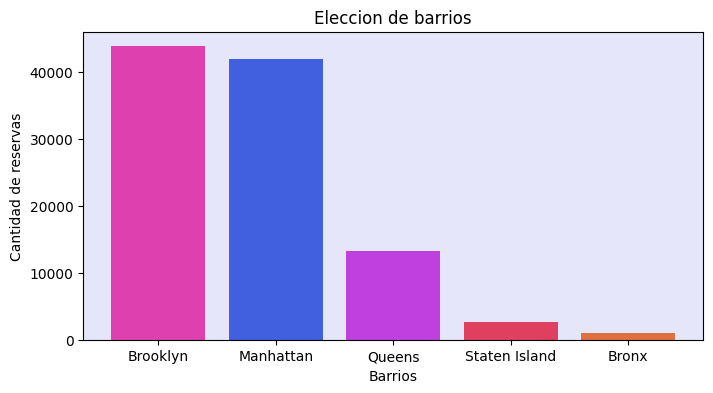

In [9]:
#Convirte los datos en String
df=df.astype(str) 

#cuenta la frecuencia de cada valor y devuelve una Serie con los recuentos
counts_neighbourhood= df['neighbourhood group'].value_counts() 

#crea una lista de valores únicos en la columna 'neighbourhood group'
barrios = df['neighbourhood group'].unique() 

#Seleccion de coleres que se usaran en los gráficos
colores = ["#DF40B0","#4060Df","#BF40DF","#DF4060",'#DF7040',"#7040DF"]

fig, ax = plt.subplots(figsize=(8,4))
ax.bar(x=barrios, height=counts_neighbourhood, color = colores) 
ax.set_title('Eleccion de barrios')
ax.set_ylabel('Cantidad de reservas')
ax.set_xlabel('Barrios')
ax.set_facecolor('lavender')
plt.show()

####                                    b) ¿Qué vecindario tiene la mejor calificación según el número de votos?
En el gráfico, se ilustra cómo se valoran los diferentes barrios según la cantidad de reseñas realizadas en cada uno. Las valoraciones van del 1 al 5. Además, debajo del gráfico se presenta un cuadro que facilita la observación del porcentaje que representa cada valoración en cada barrio

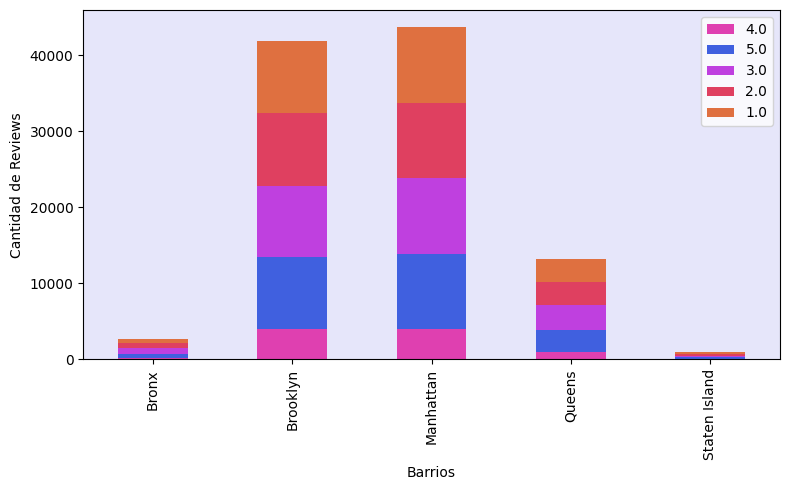

review rate number,1.0,2.0,3.0,4.0,5.0
neighbourhood group,,,,,
Bronx,6.08%,22.05%,26.25%,23.89%,21.72%
Brooklyn,9.62%,22.71%,22.33%,22.90%,22.44%
Manhattan,9.23%,22.31%,23.10%,22.37%,22.98%
Queens,6.96%,22.64%,23.98%,23.31%,23.11%
Staten Island,5.65%,22.72%,23.77%,21.36%,26.49%


In [34]:
# Asumiendo que 'data' es tu DataFrame con información sobre las reseñas
valoraciones_unicas = df['review rate number'].unique()

# Agrupar las reseñas por barrio y valoración, y contar la cantidad de reseñas
counts = df.groupby(['neighbourhood group', 'review rate number'])["number of reviews"].count().unstack(fill_value=0)

# Calcular porcentajes
percentages = counts.div(counts.sum(axis=1), axis=0) * 100

# Crear un único subplot para el gráfico
fig, ax = plt.subplots(figsize=(8, 5))

# Trazar las "counts" acumuladas como un gráfico de barras apiladas
counts.plot.bar(stacked=True, ax=ax, color=colores)

# Agregar etiquetas a los ejes
ax.set_xlabel("Barrios")
ax.set_ylabel("Cantidad de Reviews")
ax.set_facecolor('lavender')

# Agregar leyenda
ax.legend(valoraciones_unicas)

# Ajustar el diseño del gráfico
plt.tight_layout()

# Mostrar el gráfico
plt.show()

# Mostrar el cuadro de datos debajo del gráfico
styled_percentages = percentages.style.set_caption("Porcentaje de Valoraciones por Barrio").format("{:.2f}%")
display(styled_percentages)

####              c) ¿Hay una diferencia significativa en los costos de alquiler entre barrios?
Se emplearon gráficos de cajas para analizar los rangos de precios por barrios, con la premisa de que si Brooklyn y Manhattan son los más solicitados, ambos tendrían los precios más altos. Se optó por generar tanto un gráfico que represente unicamente el precio como otro que incluya además los impuestos, con el fin de determinar si esto generaba algún desequilibrio más evidente. El resultado reveló que tanto la mediana como los cuartiles son prácticamente idénticos entre todos los barrios, lo que refuta la hipótesis planteada

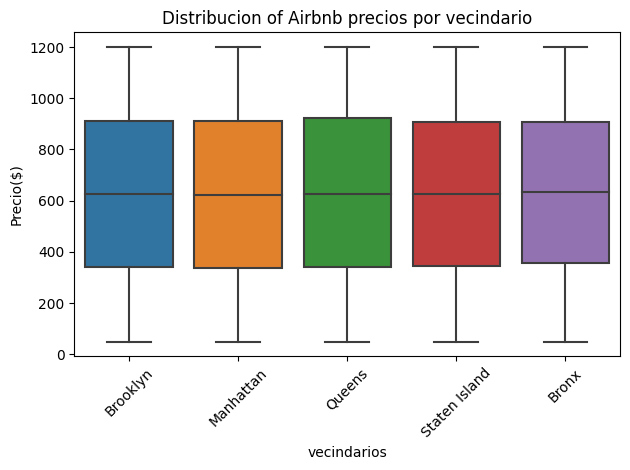

In [46]:
plt.figure()

#para trazar un diagrama de caja
sns.boxplot(x= 'neighbourhood group', y="price", data=df) 

plt.title("Distribucion of Airbnb precios por vecindario")
plt.xlabel("vecindarios")
plt.ylabel("Precio($)")

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

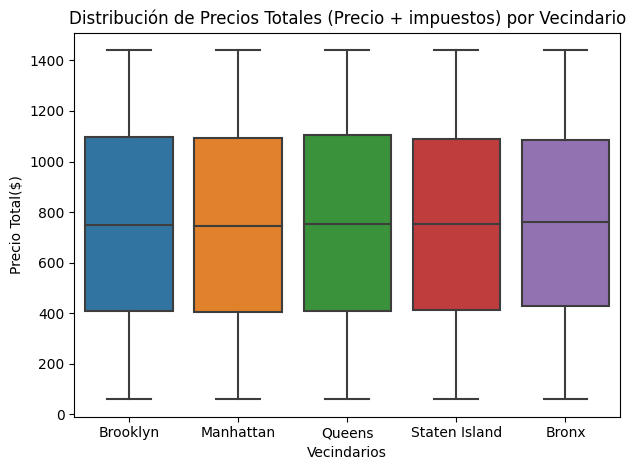

In [8]:
df['total_price'] = df['price'] + df['service fee']

plt.figure()
sns.boxplot(y='total_price', x='neighbourhood group', data=df)

plt.title("Distribución de Precios Totales (Precio + impuestos) por Vecindario")
plt.xlabel("Vecindarios")
plt.ylabel("Precio Total($)")
plt.tight_layout()
plt.show()

####                                e) ¿Qué 'tipo de habitación' es el más popular entre los huéspedes de Airbnb?
Esta gráfica circular se utiliza para determinar cuál era el tipo de habitación más elegido por el público en general, sin considerar barrios o precios. Los mayores porcentajes obtenidos corresponden a habitaciones privadas y al alquiler de casas/departamentos enteros. Por lo tanto, estos serán utilizados para continuar con el análisis.

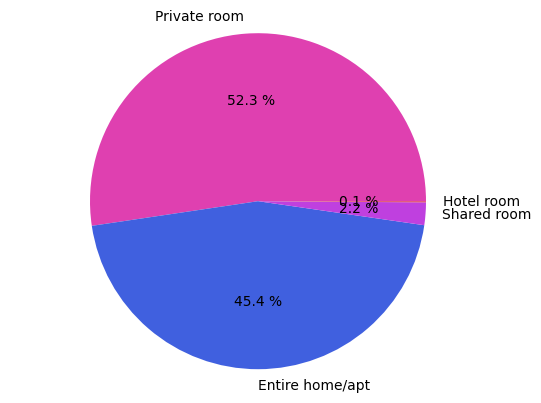

In [47]:
#obtine valor unicos de room type
tipo_hab = df['room type'].unique()

#recuenta cada valor unico
recuento_hab= df['room type'].value_counts() #recuenta cada valor unico

#se crea grafico de torta
plt.pie(recuento_hab, labels= tipo_hab, autopct="%0.1f %%", colors= colores)
plt.axis("equal")
plt.show()

 ####                   f) ¿Cuál es la preferencia de tipo de habitación entre los dos barrios más populares?
El propósito de este gráfico de barras era determinar si en los dos barrios más 'populares' persistía la misma tendencia en cuanto al 'tipo de habitación' que en el conjunto general. Como resultado, observamos una marcada preferencia por la opción de 'casa/departamento entero' en Manhattan, mientras que en Brooklyn la elección entre 'habitación privada' y 'casa/departamento entero' es bastante similar.

C:\Users\casal\miniconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


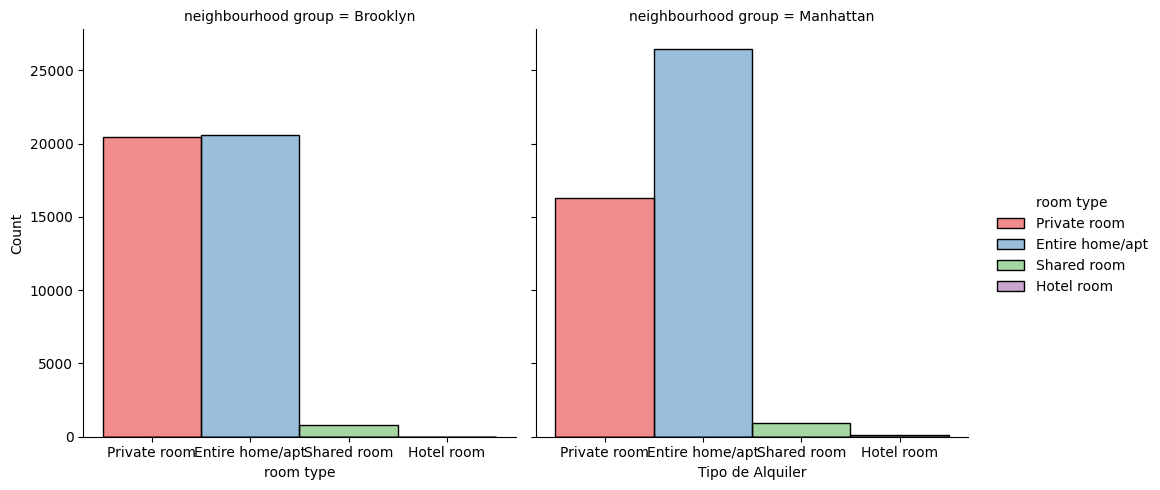

In [48]:
 #filtra solo los barrios de Brooklyn y Manhattan
brooklyn_manhattan = df[df['neighbourhood group'].isin(['Brooklyn', 'Manhattan'])]

#crea grafico donde se divide en colimnas segun el barrio.
sns.displot(data=brooklyn_manhattan, x='room type', col='neighbourhood group', hue='room type', palette='Set1')

plt.xlabel('Tipo de Alquiler')
plt.ylabel('Cantidad Alquilados')

plt.show()

#### g) ¿Cuál es la diferencia de precios entre una habitación privada y un departamento o casa completa en diferentes zonas de Brooklyn y Manhattan?

Hasta el momento, mediante el análisis, hemos identificado las preferencias del público tanto en términos de ubicación (Brooklyn y Manhattan) como en relación al tipo de alquiler (habitación privada y casa/departamento entero).

Teniendo esto en cuenta, el objetivo de este gráfico y los tres siguientes es mostrar las variaciones de precios en cada zona de los barrios (Brooklyn y Manhattan) según el tipo de alquiler (habitación privada y casa/departamento completo).

1er Gráfico: Brooklyn - Habitación Privada:
En este primer gráfico, la distribución de los datos muestra una simetría en la mayoría de los casos, ya que la mediana se encuentra en el centro del rectángulo. Los valores máximos oscilan entre 1000 y 1200 USD, y los tres barrios con la mediana más alta son Bath Beach, Columbia St. y Gravesend, con un promedio de alrededor de 800 USD. Considerando estos datos, se podría sugerir que Gravesend es la opción más atractiva, ya que no solo tiene una mediana alta, sino también un tercer cuartil significativo, lo que indica un amplio rango de variación de precios de alquiler sin desviarse demasiado de la competencia.

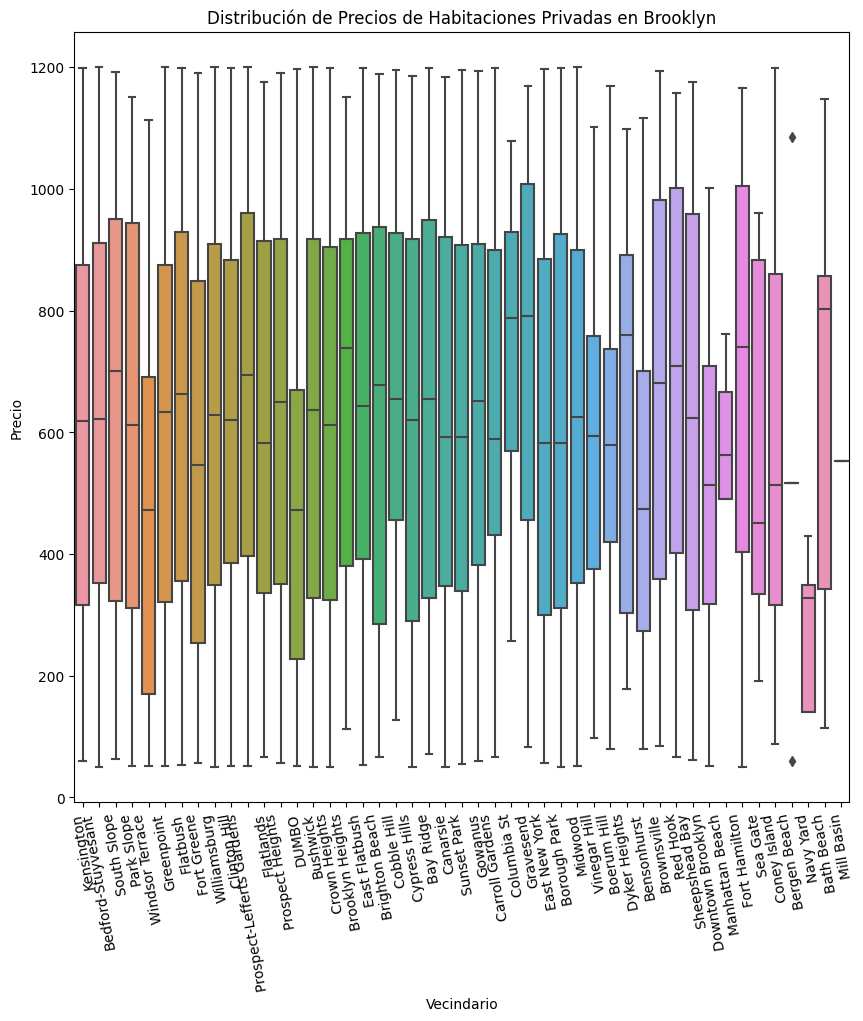

In [49]:
# Se crea grafico de Brooklyn solo teniendo en cuenta un determinado tipo de alquiler.
brooklyn_hprivada= df[(df['neighbourhood group'] == 'Brooklyn') & (df['room type'] == 'Private room')]

plt.figure(figsize=(10, 10))

sns.boxplot(x='neighbourhood', y='price', data=brooklyn_hprivada)

plt.xlabel('Vecindario')
plt.ylabel('Precio')
plt.title('Distribución de Precios de Habitaciones Privadas en Brooklyn')
plt.xticks(rotation=100)

plt.show()

2° Gráfico: Brooklyn - Casa/Departamento Completo:
En este gráfico también se puede observar una simetría en la distribución de los datos en su mayoría, y cuenta con una mediana mucho más homogénea entre todas las zonas que en el gráfico anterior. La mediana más alta, y por una gran diferencia con las demás, la tiene Coney Island (aproximadamente 900 USD). En su mayoría, los precios máximos oscilan alrededor de los 1200 USD. Sin embargo, se observa una dispersión en Mill Basin que se sale del rango de variación de datos esperados.

En este caso, la zona que consideraría más apropiada, ya que tiene una de las medianas más altas, así como también su primer y tercer cuartil más alto, permitiendo utilizar dicho rango para el precio, es Manhattan Beach.

Por lo tanto, podemos concluir que, en la comparación de estos dos gráficos, ambos muestran medianas y máximos muy similares.

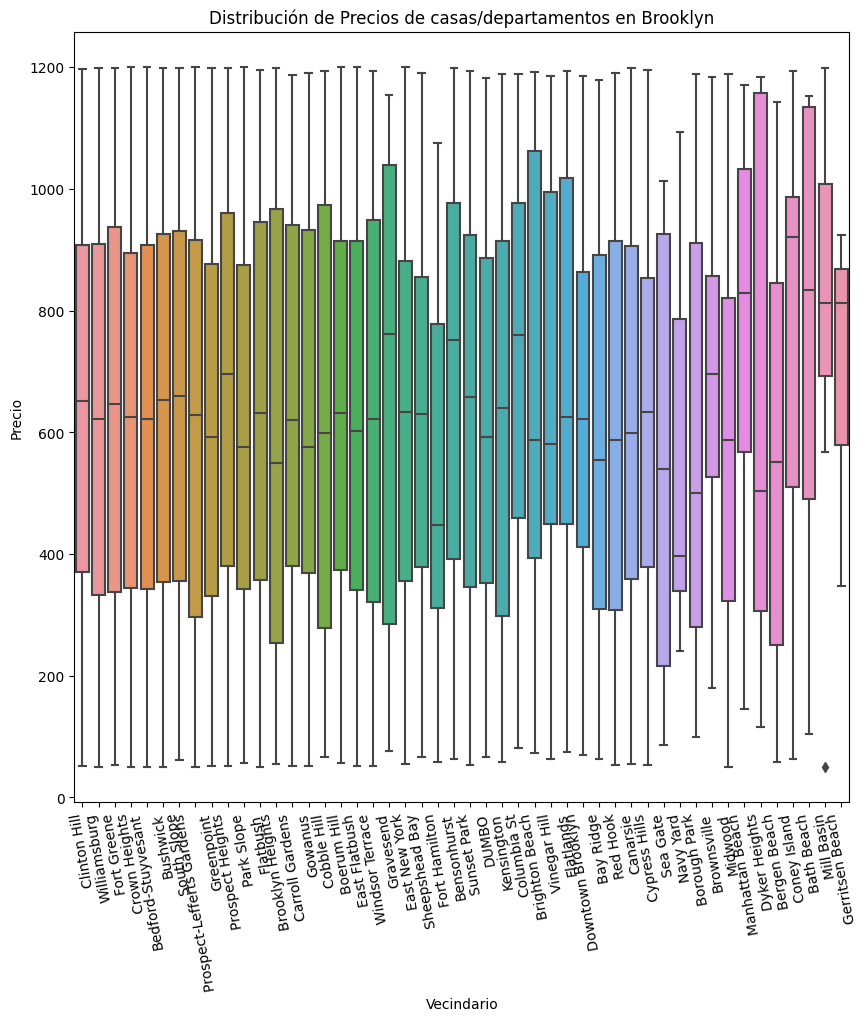

In [50]:
brooklyn_home= df[(df['neighbourhood group'] == 'Brooklyn') & (df['room type'] == 'Entire home/apt')]

plt.figure(figsize=(10, 10))

sns.boxplot(x='neighbourhood', y='price', data=brooklyn_home)

plt.xlabel('Vecindario')
plt.ylabel('Precio')
plt.title('Distribución de Precios de casas/departamentos en Brooklyn')
plt.xticks(rotation=100)

plt.show()

3° Gráfico: Manhattan - Habitación Privada:
En un primer análisis, también se observa en su mayoría una simetría en los datos, sin dispersión de precios en ninguna de las zonas. Observando tanto la mediana como el primer y tercer cuartil, podemos concluir que Tribeca es la mejor zona. Con una mediana de 750 USD, un primer cuartil por encima de los 400 USD y un tercer cuartil de poco más de 1000 USD, siendo este último uno de los más altos. Al igual que en Brooklyn, los precios máximos en su mayoría rondan los 1200 USD.

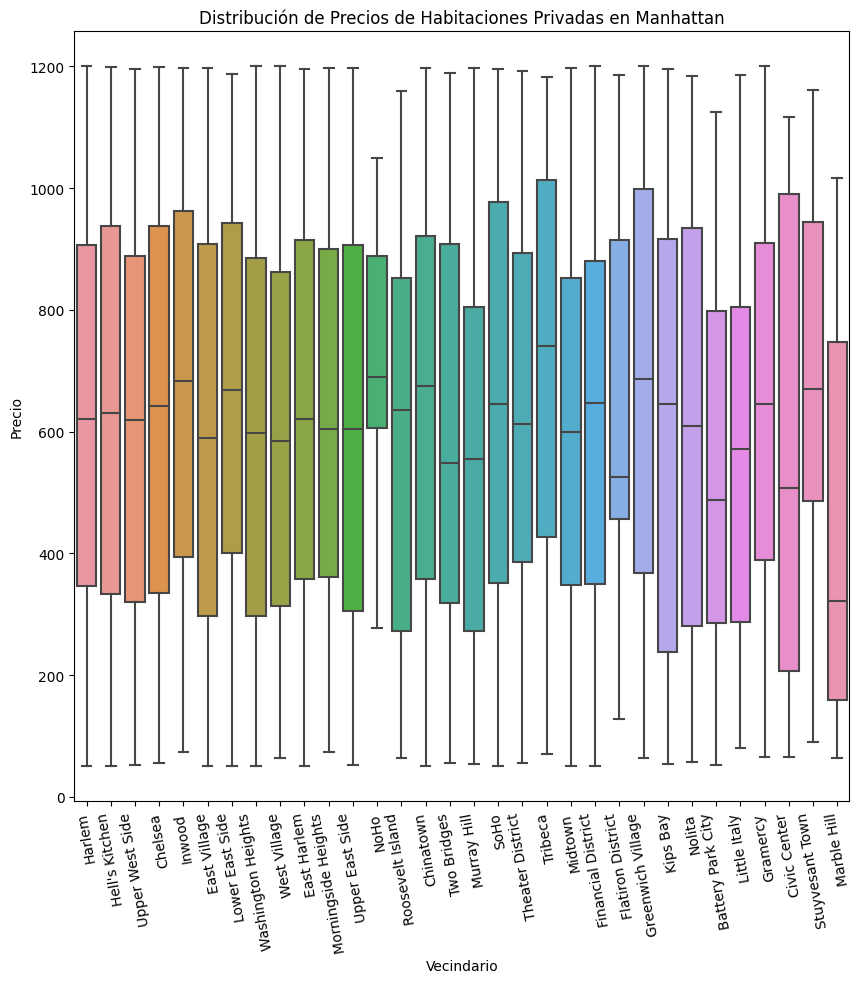

In [51]:
## Se crea grafico de Manhattan solo teniendo en cuenta un determinado tipo de alquiler.
manhattan_hprivada= df[(df['neighbourhood group'] == 'Manhattan') & (df['room type'] == 'Private room')]

plt.figure(figsize=(10, 10))

sns.boxplot(x='neighbourhood', y='price', data=manhattan_hprivada)

plt.xlabel('Vecindario')
plt.ylabel('Precio')
plt.title('Distribución de Precios de Habitaciones Privadas en Manhattan')
plt.xticks(rotation=100)

plt.show()

4° Gráfico: Manhattan - Casa/Departamento Completo:
En este gráfico, lo primero que se observa es que en este tipo de alquiler, la mediana es similar en casi todas las zonas. Lo mismo ocurre con el primer y tercer cuartil, así como con los valores máximos. La mayor diferencia se encuentra en Roosevelt Island, con un primer cuartil por encima de los 600 USD, una mediana de aproximadamente 700 USD y un tercer cuartil de casi 1000 USD.

Al comparar estos dos tipos de alquiler en Manhattan, si tomamos en cuenta las dos zonas seleccionadas en cada uno de ellos, no encontramos mucha diferencia. Sin embargo, si observamos todas las zonas y sus terceros cuartiles, los precios de una habitación resultan ser más altos.

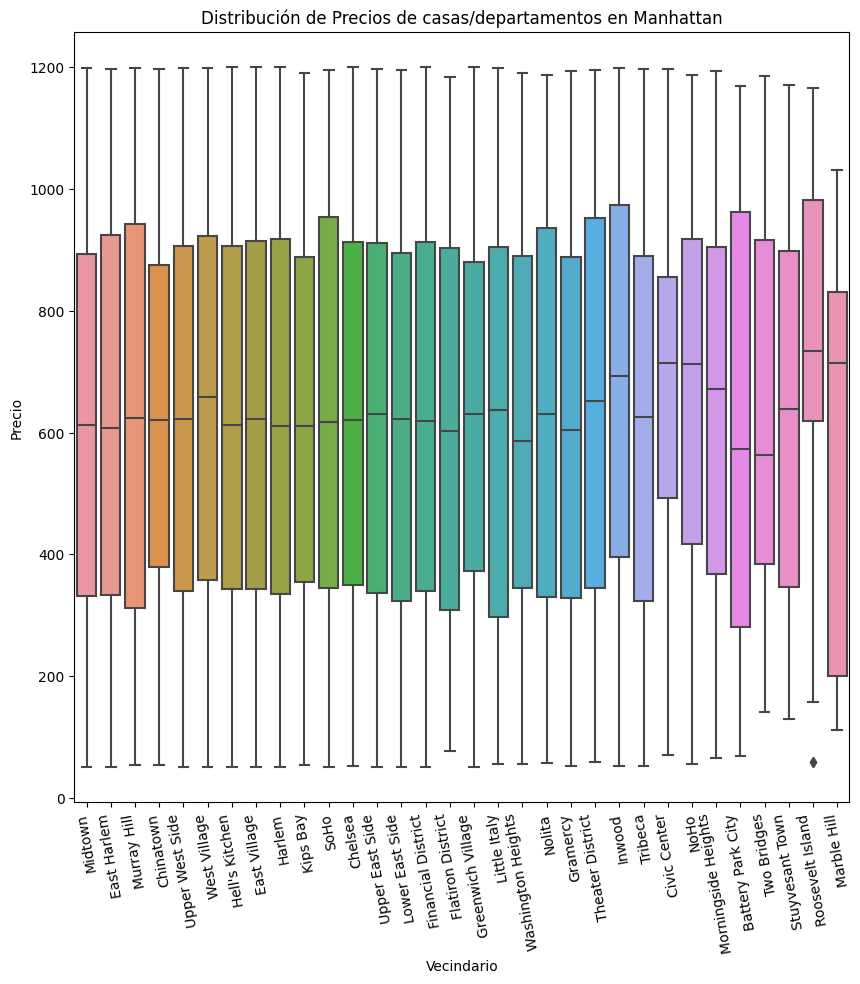

In [52]:
brooklyn_home= df[(df['neighbourhood group'] == 'Manhattan') & (df['room type'] == 'Entire home/apt')]

plt.figure(figsize=(10, 10))

sns.boxplot(x='neighbourhood', y='price', data=brooklyn_home)

plt.xlabel('Vecindario')
plt.ylabel('Precio')
plt.title('Distribución de Precios de casas/departamentos en Manhattan')
plt.xticks(rotation=100)

plt.show()

####              h) ¿Existe una diferencia promedio de precios entre una habitación privada y un casa/departamento completo?
Este gráfico de dispersión se ha creado con el fin de verificar, mediante un enfoque diferente, si realmente existe la relación de medianas que se observó en los gráficos de caja anteriores. Lo que podemos apreciar es que, independientemente del tipo de alquiler, la mediana en su mayoría oscila entre los 600 y 700 USD, reforzando lo mencionado anteriormente. Sin embargo, se pueden observar algunas dispersiones más altas en los casos de casas/departamentos completos, como en el caso de Coney Island, y dispersiones más bajas en el caso de habitaciones privadas, como en Marble Hill.

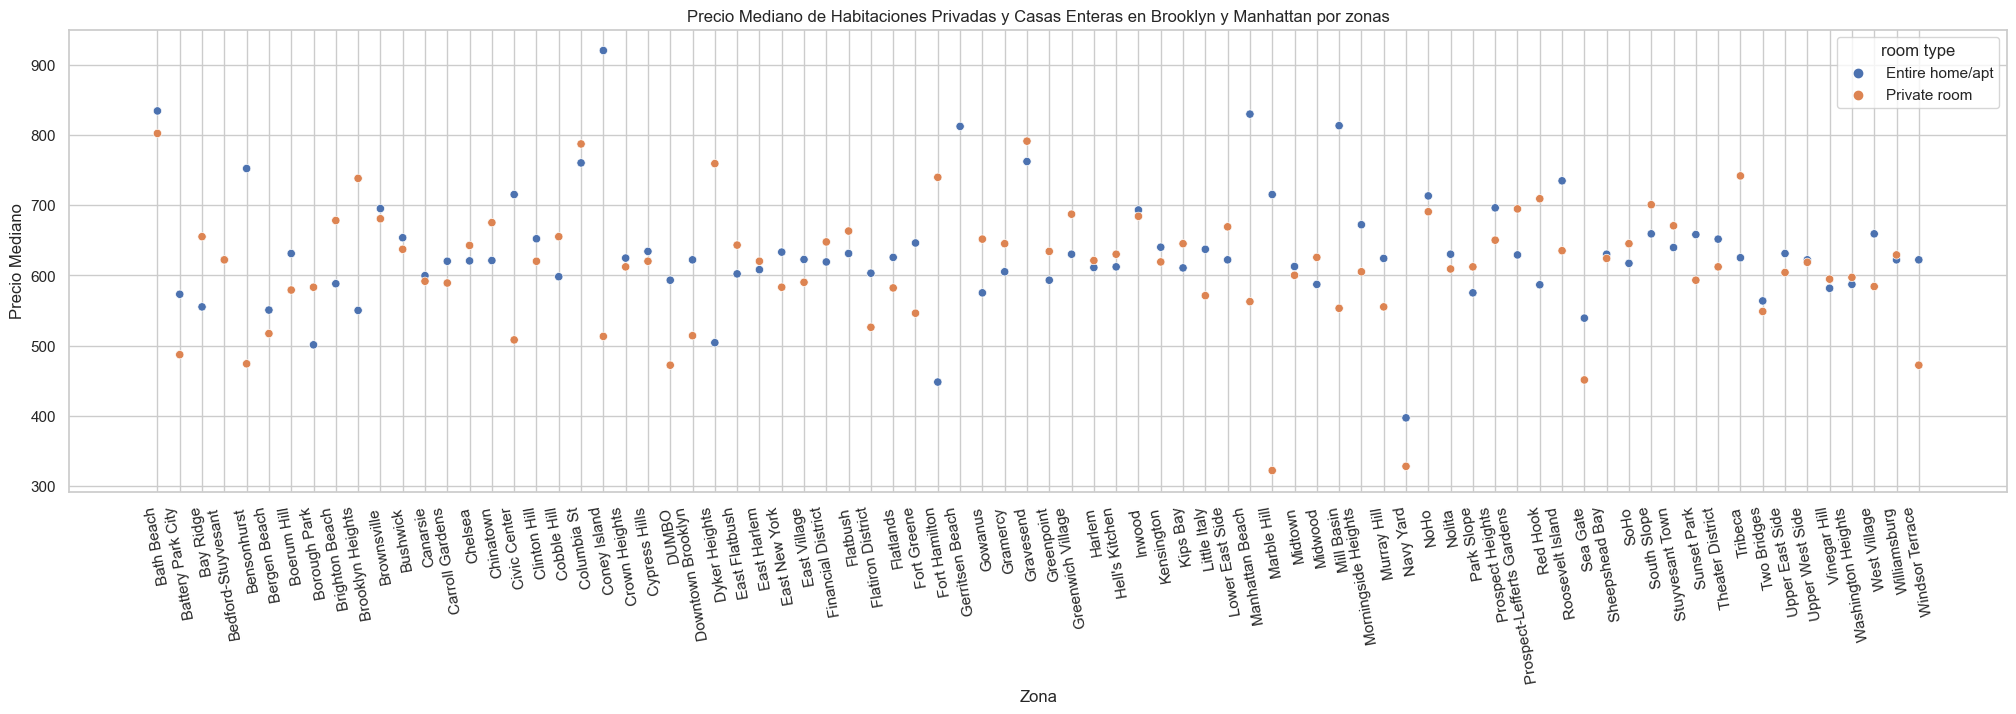

In [53]:
#Crea un grafico scatterplot de los diferentes precios segun sea hab. privada o dpto entero en los barrios de Brooklyn y Manhattan
brooklyn_manhattan= brooklyn_manhattan[brooklyn_manhattan['room type'].isin(['Private room', 'Entire home/apt'])]

mediana_precios = brooklyn_manhattan.groupby(['neighbourhood', 'room type'])['price'].median().reset_index()

sns.set(style="whitegrid")
plt.figure(figsize=(25, 6))

sns.scatterplot(x='neighbourhood', y='price', hue='room type', data=mediana_precios)

plt.xlabel('Zona')
plt.ylabel('Precio Mediano')
plt.title('Precio Mediano de Habitaciones Privadas y Casas Enteras en Brooklyn y Manhattan por zonas')
plt.xticks(rotation=100)

plt.show()

####  i) ¿Existe una relación entre el precio y la cantidad de alquileres en los barrios mencionados? Es decir, ¿tiene la zona más barata mayor cantidad alquileres? 

La hipótesis planteada es sencilla: ¿Si el alquiler es más económico, la gente tiende a alquilar más? Observando este gráfico, que representa el precio promedio frente a la cantidad de reservas, podemos notar que, al menos en este conjunto de datos, la media de precios es muy similar entre los distintos alojamientos. Sin embargo, aquellos ubicados en lugares de mayor atracción registran un mayor número de reservas.

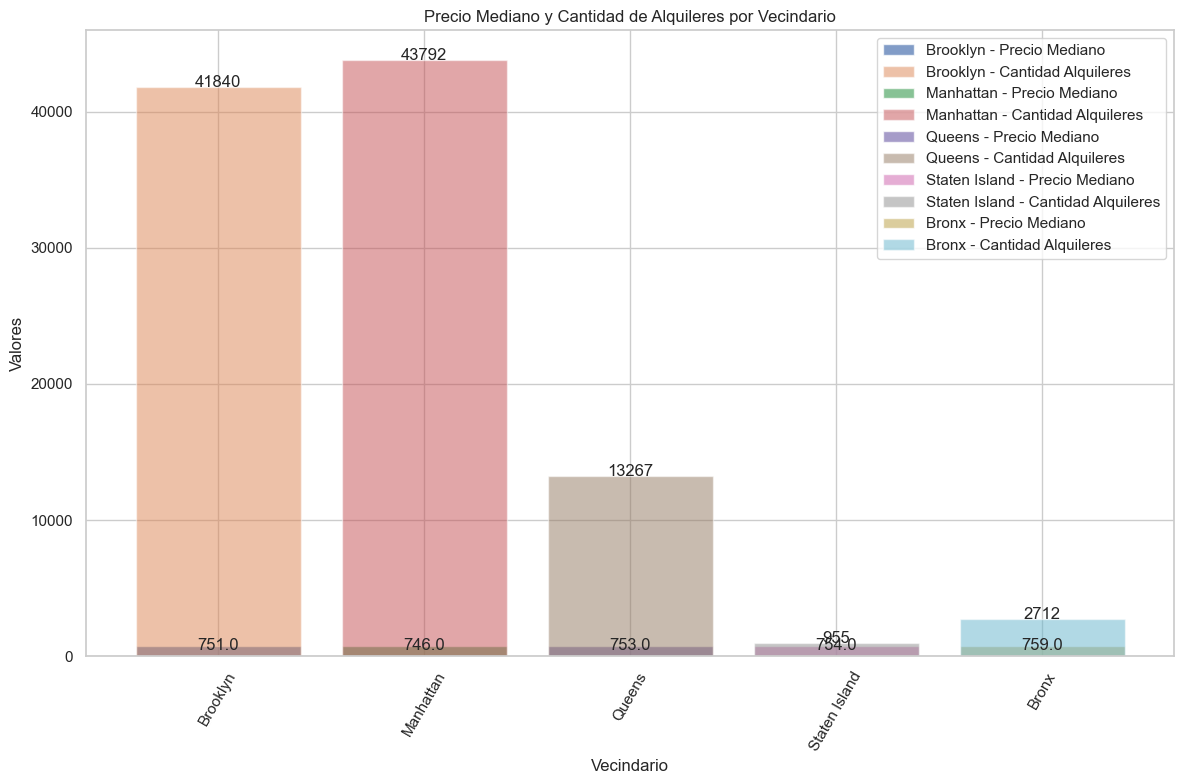

In [54]:
vecindarios = df['neighbourhood group'].unique()

# Inicializar el gráfico
plt.figure(figsize=(12, 8))

for vecindario in vecindarios:
    datos_vecindario = df[df['neighbourhood group'] == vecindario]
    
    precio_promedio = datos_vecindario['price'].median() + datos_vecindario['service fee'].median()
    cantidad_alquileres = len(datos_vecindario)
    
    # Graficar barras agrupadas para cada vecindario
    plt.bar(vecindario, precio_promedio, label=f'{vecindario} - Precio Mediano', alpha=0.7)
    plt.text(vecindario, precio_promedio + 5, f'{precio_promedio}', ha='center',  va='center')
    
    plt.bar(vecindario, cantidad_alquileres, label=f'{vecindario} - Cantidad Alquileres', alpha=0.5)
    plt.text(vecindario, cantidad_alquileres + 5, f'{cantidad_alquileres}', ha='center') 

# Configuraciones del gráfico
plt.xlabel('Vecindario')
plt.ylabel('Valores')
plt.title('Precio Mediano y Cantidad de Alquileres por Vecindario')
plt.legend()
plt.xticks(rotation=60)
plt.tight_layout()

# Mostrar el gráfico
plt.show()

#### j) ¿Es necesario verificar la disponibilidad de la propiedad antes de realizar una reserva en Airbnb?, 
#### k) ¿Preferyen los huéspedes de Airbnb que las reservas sean instantáneas o que sean confirmadas con anticipación?
En los siguientes gráficos de barra lo que se trataba de responder es si tenia incidencia a la hora de elegir alquiler que quien lo alquile se encuentre verificado, como si la reserva era inmediata. Realmente no se puede apreciardiferencia de esto, al menos en este dataset, ya que parece tener un equilibrio entre las diferentes opciones mencionadas.

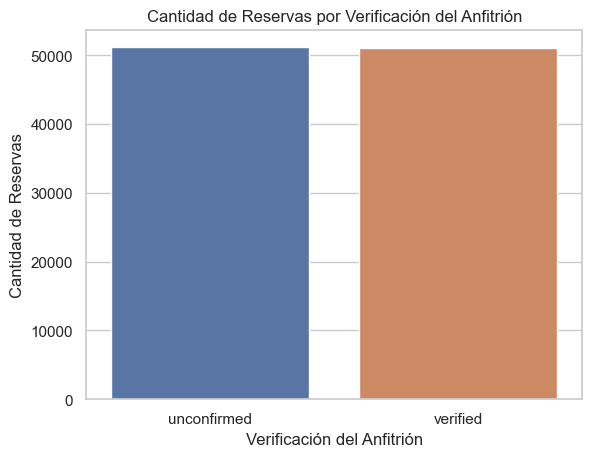

host_identity_verified
unconfirmed        51189
verified           51096
Sin Información      281
Name: count, dtype: int64


In [55]:
#grafico que recuenta verificacion de los anfitriones
sns.countplot(x='host_identity_verified', data=df)

#rellenar los Nan con la frase "sin informacion"
df['host_identity_verified'].fillna('Sin Información', inplace=True)

plt.xlabel('Verificación del Anfitrión')
plt.ylabel('Cantidad de Reservas')
plt.title('Cantidad de Reservas por Verificación del Anfitrión')

plt.show()
print(df['host_identity_verified'].value_counts())

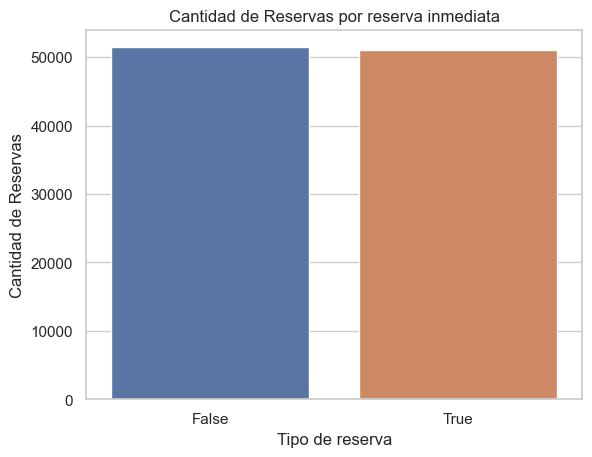

instant_bookable
False    51456
True     51006
Name: count, dtype: int64


In [56]:
##grafico que recuenta de reservas inmediatas de los anfitriones
sns.countplot(x='instant_bookable', data=df )

plt.xlabel('Tipo de reserva')
plt.ylabel('Cantidad de Reservas')
plt.title('Cantidad de Reservas por reserva inmediata')

plt.show()
print(df['instant_bookable'].value_counts())

### Conclusiones preliminares:
En nuestro enfoque hacia el desarrollo de un modelo predictivo que identifique la mejor zona para establecer un alquiler temporario en Airbnb, considerando características específicas del cliente, podemos extraer las siguientes observaciones preliminares:
- 
La elección de la ubicación no está determinada principalmente por el precio, ya que encontramos mínimas variaciones en los costos. En cambio, parece que los factores decisivos son la seguridad del barrio, su popularidad y las atracciones cercanas, que pueden ser relevantes para satisfacer las necesidades y preferencias del clite*- 

A pesar de que la mayoría de los alojamientos preferidos son habitaciones privadas en general, en las zonas más solicitadas (Brooklyn y Manhattan), los clientes parecen inclinarse hacia el alquiler de casas/departamentos completos, lo que puede ofrecer una mayor comodidad y acidada- d.

En relación con los precios, observamos que no hay una diferencia significativa entre los alquileres de casas/departamentos completos y habitaciones privadas. Por lo tanto, al seleccionar la mejor opción para el cliente, será fundamental considerar otras características específicas de la propieda ud y ba* c- ión.

Respecto a la verificación del arrendador y la disponibilidad de confirmación instantánea, el dataset no proporciona una visión clara sobre su influencia en la selección de la ubicación. Sin embargo, estos aspectos pueden ser importantes para generar confianza y facilitar una experiencia de reserva fluida para el cliente.

Estas conclusiones preliminares brindan una base inicial para la construcción de un modelo predictivo que tenga en cuenta las características específicas del cliente y las preferencias del mercado para identificar la mejor zona para establecer un alquiler temporario en Airbnb. Sin embargo, se requerirá un análisis más detallado y la inclusión de otras variables relevantes para desarrollar un modelo predictivo efectivo y preciso.

# PSA

In [7]:
# Supongamos que tu dataframe se llama df
columnas_a_eliminar = ['id', 'NAME', 'host id', 'host_identity_verified', 'host name', 'lat', 'long', 'country', 'country code', 'Construction year', 'availability 365', 'house_rules', 'last review']

# Eliminar las columnas
df = df.drop(columnas_a_eliminar, axis=1)

df.dropna(inplace=True)

# Inicializar LabelEncoder para 'neighbourhood group'
label_encoder = LabelEncoder()

# Convierte 'neighbourhood group' en niveles
df['neighbourhood group'] = label_encoder.fit_transform(df['neighbourhood group'])
df['neighbourhood'] = label_encoder.fit_transform(df['neighbourhood'])
df['cancellation_policy'] = label_encoder.fit_transform(df['cancellation_policy'])
df['room type'] = label_encoder.fit_transform(df['room type'])


#fijar las variables
X = df.drop(['neighbourhood group'], axis=1) 
# La variable objetivo que quieres predecir
y = df['neighbourhood group']

# Dividir el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalizar los datos
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Aplicar PCA
pca = PCA()
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

# Crear y entrenar el modelo CatBoost
model = CatBoostClassifier()
model.fit(X_train, y_train)

# Evaluar el modelo
accuracy = model.score(X_test, y_test)
print(f'Accuracy: {accuracy}')

Learning rate set to 0.098167
0:	learn: 1.5143854	total: 249ms	remaining: 4m 8s
1:	learn: 1.4391204	total: 306ms	remaining: 2m 32s
2:	learn: 1.3779185	total: 374ms	remaining: 2m 4s
3:	learn: 1.3285454	total: 432ms	remaining: 1m 47s
4:	learn: 1.2878596	total: 503ms	remaining: 1m 40s
5:	learn: 1.2533496	total: 555ms	remaining: 1m 32s
6:	learn: 1.2236386	total: 608ms	remaining: 1m 26s
7:	learn: 1.1983026	total: 661ms	remaining: 1m 22s
8:	learn: 1.1753339	total: 718ms	remaining: 1m 19s
9:	learn: 1.1557769	total: 781ms	remaining: 1m 17s
10:	learn: 1.1382347	total: 838ms	remaining: 1m 15s
11:	learn: 1.1240635	total: 890ms	remaining: 1m 13s
12:	learn: 1.1107998	total: 956ms	remaining: 1m 12s
13:	learn: 1.0993975	total: 1.01s	remaining: 1m 11s
14:	learn: 1.0888054	total: 1.06s	remaining: 1m 9s
15:	learn: 1.0801446	total: 1.12s	remaining: 1m 8s
16:	learn: 1.0730334	total: 1.17s	remaining: 1m 7s
17:	learn: 1.0656248	total: 1.23s	remaining: 1m 7s
18:	learn: 1.0596376	total: 1.28s	remaining: 1m 6s

## PSA con validación cruzada

In [8]:
# Aplicar PCA
pca = PCA()
X = pca.fit_transform(X)

# Crear y entrenar el modelo CatBoost
model = CatBoostClassifier()

# Aplicar validación cruzada con 5 pliegues
scores = cross_val_score(model, X, y, cv=5)

# Imprimir los resultados de la validación cruzada
print("Cross-Validation Scores:", scores)
print("Mean Accuracy:", scores.mean())


Learning rate set to 0.098167
0:	learn: 1.4461622	total: 61.8ms	remaining: 1m 1s
1:	learn: 1.3306183	total: 129ms	remaining: 1m 4s
2:	learn: 1.2378393	total: 188ms	remaining: 1m 2s
3:	learn: 1.1669335	total: 257ms	remaining: 1m 3s
4:	learn: 1.1081043	total: 322ms	remaining: 1m 4s
5:	learn: 1.0615605	total: 380ms	remaining: 1m 3s
6:	learn: 1.0183685	total: 433ms	remaining: 1m 1s
7:	learn: 0.9837477	total: 492ms	remaining: 1m
8:	learn: 0.9524828	total: 539ms	remaining: 59.4s
9:	learn: 0.9262605	total: 588ms	remaining: 58.2s
10:	learn: 0.9021162	total: 638ms	remaining: 57.4s
11:	learn: 0.8825217	total: 689ms	remaining: 56.7s
12:	learn: 0.8627601	total: 758ms	remaining: 57.5s
13:	learn: 0.8445220	total: 811ms	remaining: 57.1s
14:	learn: 0.8282467	total: 863ms	remaining: 56.7s
15:	learn: 0.8137802	total: 912ms	remaining: 56.1s
16:	learn: 0.8016354	total: 969ms	remaining: 56s
17:	learn: 0.7868934	total: 1.03s	remaining: 56.5s
18:	learn: 0.7763514	total: 1.08s	remaining: 56s
19:	learn: 0.7676

#### Insight PSA y PSA con validación cruzada
Sin validación cruzada:
Accura :y6%9
Con validación cuddaz 89%a8901
La precisión promedio obtenida mediante la validación cruzada es significativamente mayor que la precisión obtenida sin ella. Esto sugiere que el modelo tiene un mejor rendimiento generalizado cuando se evalúa mediante validación cruzada en múltiples pliegues del conjunto de datos. La validación cruzada proporciona una estimación más robusta del rendimiento del modelo al considerar diferentes subdivisiones de los datos de entrenamiento, lo que ayuda a evaluar mejor la capacidad de generalización del modelo. En este caso, el modelo CatBoost parece ser más preciso y consistente en su capacidad para clasificar los datos cuando se utiliza validación cruzada.

## Random Forest utilizando PCA

In [9]:
#Análisis de la varianza explicada para cada componente
explained_variance = pca.explained_variance_ratio_
explained_variance

array([9.25802898e-01, 3.88882864e-02, 2.19391342e-02, 7.13511494e-03,
       6.10338446e-03, 8.61577207e-05, 1.61745295e-05, 1.29987819e-05,
       8.44881909e-06, 5.37931435e-06, 2.02244227e-06])

In [10]:
# Dividir el conjunto de datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Aplicar PCA con el número deseado de componentes
pca = PCA(n_components=5)  
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

In [11]:
# Crear y ajustar el modelo de Random Forest
model_rf_pca = RandomForestClassifier(max_depth=2, random_state=0)
model_rf_pca.fit(X_train_pca, y_train)

# Realizar predicciones
y_pred_pca = model_rf_pca.predict(X_test_pca)

# Calcular la precisión del modelo
accuracy_pca = accuracy_score(y_test, y_pred_pca)
print('El accuracy del modelo de Random Forest después de PCA es:', accuracy_pca)

El accuracy del modelo de Random Forest después de PCA es: 0.6557577878893944


### random forest con Cross Validation

In [12]:
# Aplicar validación cruzada al modelo de Random Forest después de PCA
cv_scores_rf_pca = cross_val_score(model_rf_pca, X_train_pca, y_train, cv=5)

# Imprimir los resultados
print("Accuracy de cada pliegue:", cv_scores_rf_pca)
print("Accuracy promedio:", cv_scores_rf_pca.mean())

Accuracy de cada pliegue: [0.65004011 0.65434259 0.65937432 0.6540509  0.65478014]
Accuracy promedio: 0.6545176110260338


### Insight Random Forest y Random Forest con cross validation


Accurc : y65,56%8:

Accurpromedio: 65,45%
6545
Ambos resultados son bastante similares, con diferencias mínimas en la precisión del modelo. Sin embargo, es importante tener en cuenta que el resultado con PCA y validación cruzada es el promedio de múltiples ejecuciones del modelo en diferentes pliegues de los datos, lo que proporciona una estimación más ro del modelo.delo.

## Regresión logistica con PCA

In [13]:
# Dividir el conjunto de datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Aplicar PCA con el número deseado de componentes
pca = PCA(n_components=4)  
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Entrenar un modelo de regresión logística con los componentes principales
model = LogisticRegression()
model.fit(X_train_pca, y_train)

# Predecir las etiquetas de clase para el conjunto de prueba
y_pred = model.predict(X_test_pca)

# Calcular la precisión del modelo
accuracy = accuracy_score(y_test, y_pred)
print("El accuracy del modelo de regresión logística después de PCA es:", accuracy)

El accuracy del modelo de regresión logística después de PCA es: 0.5242678800606697


C:\Users\casal\miniconda3\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


#### Insight regresion logisica:

El accuracy del modelo de regresión logística después de aplicar PCA con 4 componentes principales es de aproximadamente 0.5241. Esto indica que el modelo de regresión logística clasificó correctamente alrededor del 52.21% de las muestras en el conjunto de prueba.

Esta precisión puede considerarse relativamente baja y podría sugerir que el modelo de regresión logística no está siendo eficaz para clasificar los datos después de la reducción de dimensionalidad realizada por PCA.

# Método de feature selection

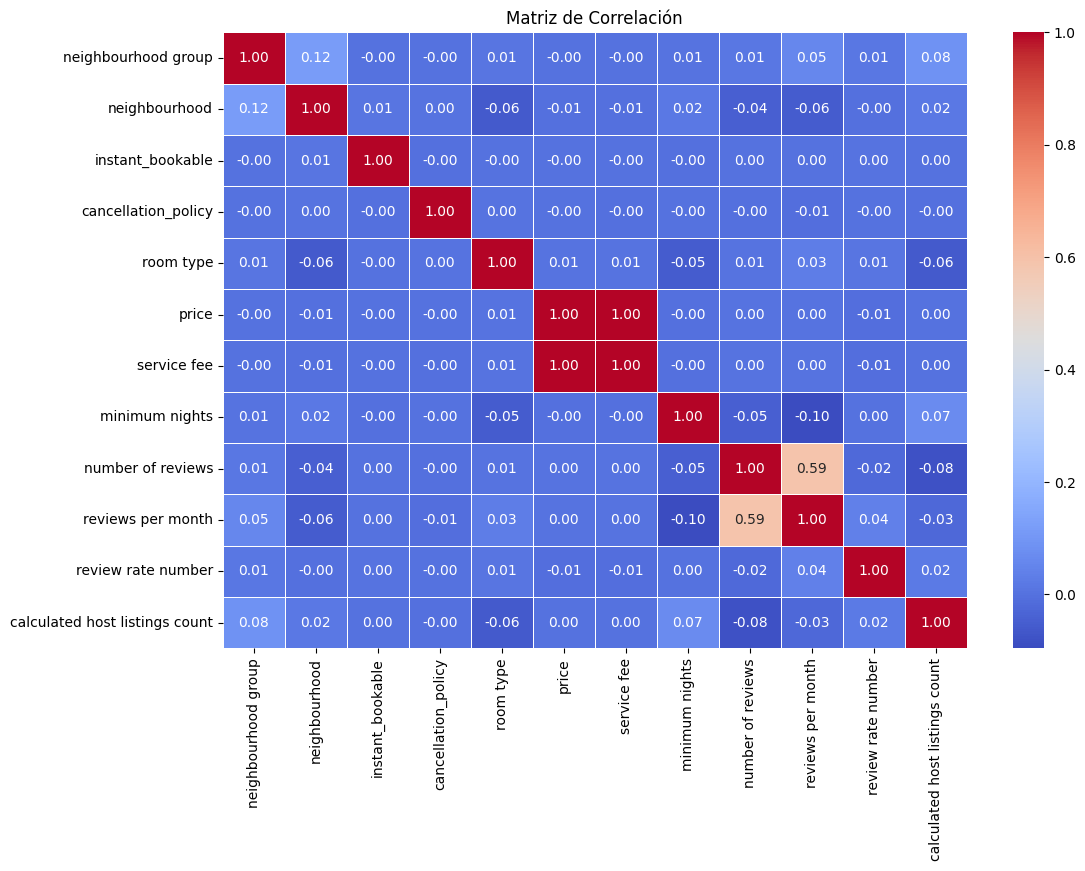

In [116]:
# Crea un gráfico de calor utilizando seaborn
plt.figure(figsize=(12, 8))
heatmap = sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=.5)
plt.title('Matriz de Correlación')
plt.show()

# Árbol de Decisión:

In [31]:
# Seleccionar las columnas relevantes

df3 = df[['neighbourhood group', 'Construction year', 'price', 'minimum nights', 
             'number of reviews', 'reviews per month','review rate number', 'room type']]


# Inicializar LabelEncoder para 'neighbourhood group'
label_encoder = LabelEncoder()

# Convierte 'neighbourhood group' en niveles
df3['neighbourhood group'] = label_encoder.fit_transform(df3['neighbourhood group'])
df3['room type'] = label_encoder.fit_transform(df3['room type'])

# Dividir en características (X) y variable objetivo (y)
X = df3.drop(['neighbourhood group'], axis=1)
y = df3['neighbourhood group']

# Dividir el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear el modelo de árbol de decisión
model = DecisionTreeClassifier(random_state=42)

# Entrenar el modelo
model.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred = model.predict(X_test)

# Evaluar la precisión del modelo
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

# Imprimir el reporte de clasificación
print(classification_report(y_test, y_pred))


C:\Users\casal\AppData\Local\Temp\ipykernel_4652\305766137.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['neighbourhood group'] = label_encoder.fit_transform(df3['neighbourhood group'])
C:\Users\casal\AppData\Local\Temp\ipykernel_4652\305766137.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['room type'] = label_encoder.fit_transform(df3['room type'])


Accuracy: 0.6325436287413474
              precision    recall  f1-score   support

           0       0.36      0.39      0.38       530
           1       0.65      0.66      0.65      8465
           2       0.67      0.69      0.68      8767
           3       0.52      0.41      0.46      2588
           4       0.45      0.29      0.35       164

    accuracy                           0.63     20514
   macro avg       0.53      0.49      0.50     20514
weighted avg       0.63      0.63      0.63     20514



### Insight árbol de decision
El modelo de árbol de decisión alcanzó una precisión (accuracy) de aproximadamente 0.6325 en el conjunto de prueba. A continuación, se presenta un resumen del reporte de clasificación:

Clase 0 (Bronx): La precisión para esta clase es del 36%, lo que significa que el 36% de las predicciones positivas fueron correctas. El recall es del 39%, lo que indica que el modelo identificó correctamente el 39% de todas las instancias verdaderamente positivas de esta clase. El valor de F1-score es del 38%, que es una medida balanceada entre precisión y recall.

Clase 1 (Brooklyn): El modelo logró una precisión del 65% para esta clase, lo que significa que el 65% de las predicciones positivas fueron correctas. El recall es del 66%, lo que indica que el modelo identificó correctamente el 66% de todas las instancias verdaderamente positivas de esta clase. El valor de F1-score es del 65%.

Clase 2 (Manhattan): La precisión para esta clase es del 67%, con un recall del 69% y un F1-score del 68%.

Clase 3 (Queens): El modelo alcanzó una precisión del 52% para esta clase, con un recall del 41% y un F1-score del 46%.

Clase 4 (Staten Island): La precisión para esta clase es del 45%, con un recall del 29% y un F1-score del 35%.

El resumen macro avg y weighted avg proporciona métricas promedio para todas las clases. En este caso, el F1-score promedio ponderado (weighted avg) es del 63%, lo que indica el rendimiento general del modelo en la clasificación de todas las clases en el conjunto de prueba.

## Arbol de decision con cross validation

In [32]:
# Crear el modelo de árbol de decisión
model = DecisionTreeClassifier(random_state=42)

# Aplicar validación cruzada
cv_scores = cross_val_score(model, X, y, cv=5)

# Imprimir los resultados
print("Accuracy de cada pliegue:", cv_scores)
print("Accuracy promedio:", cv_scores.mean())

Accuracy de cada pliegue: [0.60919372 0.69375518 0.40759518 0.69126895 0.83454395]
Accuracy promedio: 0.6472713967364954


### Insight arbol de regresion con cross validation
El rendimiento del modelo puede variar según la partición específica del conjunto de datos utilizada en cada pliegue, pero en promedio, el modelo alcanza una precisión del 64.72% en datos no vistos. 

# Grid Search

In [152]:
# Definir la cuadrícula de hiperparámetros a explorar
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Crear el objeto GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Realizar la búsqueda en la cuadrícula
grid_search.fit(X_train, y_train)

# Imprimir los mejores parámetros encontrados
print("Mejores hiperparámetros encontrados:")
print(grid_search.best_params_)

# Realizar predicciones en el conjunto de prueba con los mejores parámetros
y_pred = grid_search.predict(X_test)

# Imprimir el reporte de clasificación con los mejores parámetros
print("\nReporte de clasificación con mejores parámetros:")
print(classification_report(y_test, y_pred))

Mejores hiperparámetros encontrados:
{'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}

Reporte de clasificación con mejores parámetros:
               precision    recall  f1-score   support

        Bronx       0.37      0.38      0.37       530
     Brooklyn       0.63      0.67      0.65      8465
    Manhattan       0.65      0.66      0.66      8767
       Queens       0.50      0.40      0.45      2588
Staten Island       0.34      0.30      0.32       164

     accuracy                           0.62     20514
    macro avg       0.50      0.48      0.49     20514
 weighted avg       0.62      0.62      0.62     20514



### Insight
Este reporte de clasificación con los mejores parámetros indica la precisión, recall y f1-score para cada clase en el conjunto de prueba. Los valores de precisión, recall y f1-score para cada clase y la métrica macro y ponderada (macro avg y weighted avg) son los mismos que los obtenidos anteriormente sin grid search. Esto sugiere que los hiperparámetros optimizados no mejoraron significativamente el rendimiento del modelo en comparación con los valores por defecto.

### Grafico de matriz de confusion

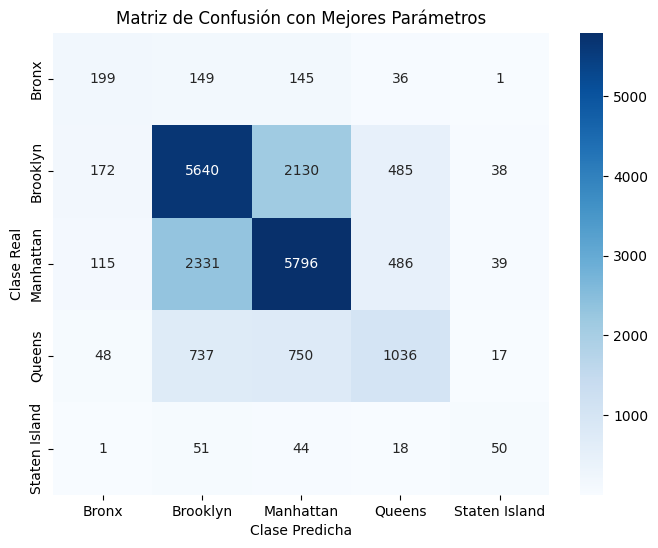

In [153]:
# Obtener las predicciones del modelo con los mejores parámetros
y_pred_best = grid_search.predict(X_test)

# Construir la matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred_best)

# Visualizar la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d', xticklabels=grid_search.classes_, yticklabels=grid_search.classes_)
plt.xlabel('Clase Predicha')
plt.ylabel('Clase Real')
plt.title('Matriz de Confusión con Mejores Parámetros')
plt.show()

# k-Vecinos Más Cercanos (KNN)

In [37]:
# Seleccionar las columnas relevantes
df5 = df[['neighbourhood group','Construction year', 'price',
              'reviews per month','review rate number', 'room type']]

df.dropna(inplace=True)

# Inicializar LabelEncoder para 'neighbourhood group'
label_encoder = LabelEncoder()

# Convierte 'neighbourhood group' en niveles
df5['neighbourhood group'] = label_encoder.fit_transform(df5['neighbourhood group'])
df5['room type'] = label_encoder.fit_transform(df5['room type'])

# Dividir en características (X) y variable objetivo (y)
X = df5.drop(['neighbourhood group'], axis=1)
y = df5['neighbourhood group']

# Dividir el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Concatenar X y y para eliminar filas correspondientes
df_concatenated = pd.concat([X, y], axis=1)

# Eliminar filas con valores NaN
df_concatenated.dropna(inplace=True)

# Separar nuevamente X y y
X = df_concatenated.drop('neighbourhood group', axis=1)
y = df_concatenated['neighbourhood group']

# Dividir los datos en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear el modelo KNN
knn_model = KNeighborsClassifier(n_neighbors=1)  # Puedes ajustar el valor de k aquí

# Entrenar el modelo
knn_model.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred = knn_model.predict(X_test)

# Evaluar la precisión del modelo
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

# Imprimir el reporte de clasificación
print(classification_report(y_test, y_pred))

C:\Users\casal\AppData\Local\Temp\ipykernel_8472\3251872667.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df5['neighbourhood group'] = label_encoder.fit_transform(df5['neighbourhood group'])
C:\Users\casal\AppData\Local\Temp\ipykernel_8472\3251872667.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df5['room type'] = label_encoder.fit_transform(df5['room type'])


Accuracy: 0.7323359316067387
              precision    recall  f1-score   support

           0       0.62      0.64      0.63       183
           1       0.75      0.74      0.75      3345
           2       0.75      0.76      0.75      3407
           3       0.64      0.63      0.64       942
           4       0.66      0.64      0.65        77

    accuracy                           0.73      7954
   macro avg       0.68      0.68      0.68      7954
weighted avg       0.73      0.73      0.73      7954



### Insight
El resultado obtenido para el modelo KNN muestra una precisión del 73.23%, lo que indica que el modelo clasifica correctamente alrededor del 73.23% de las muestras en el conjunto de prueba.
En general, el modelo parece tener un desempeño decente en la mayoría de las clases, con precisiones y recalls relativamente altos. Sin embargo, sería útil investigar posibles estrategias para mejorar el rendimiento del modelo, como ajustar los hiperparámetros o considerar técnicas de preprocesamiento de datos adicionales.es

# Random Forest

In [46]:
# Seleccionar las columnas relevantes
df4 = df[['neighbourhood group','Construction year', 'price','service fee', 
             'number of reviews', 'reviews per month','review rate number', 'room type']]

df4.dropna(inplace=True)

# Inicializar LabelEncoder para 'neighbourhood group'
label_encoder = LabelEncoder()

# Convierte 'neighbourhood group' en niveles
df['neighbourhood group'] = label_encoder.fit_transform(df['neighbourhood group'])
df['room type'] = label_encoder.fit_transform(df['room type'])

# Dividir en características (X) y variable objetivo (y)
X = df4.drop(['neighbourhood group'], axis=1)
y = df4['neighbourhood group']

# Dividir el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear el modelo Random Forest
model = RandomForestClassifier(random_state=42)

# Entrenar el modelo
model.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred = model.predict(X_test)

# Evaluar la precisión del modelo
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

# Imprimir el reporte de clasificación
print(classification_report(y_test, y_pred))

C:\Users\casal\AppData\Local\Temp\ipykernel_8472\1004034308.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df4.dropna(inplace=True)


Accuracy: 0.750314307266784
              precision    recall  f1-score   support

           0       0.99      0.63      0.77       183
           1       0.73      0.77      0.75      3345
           2       0.74      0.78      0.76      3407
           3       0.89      0.59      0.71       942
           4       1.00      0.64      0.78        77

    accuracy                           0.75      7954
   macro avg       0.87      0.68      0.75      7954
weighted avg       0.76      0.75      0.75      7954



#### Insight

El resultado del modelo de Random Forest es el siguiente:

Accuracy: 0.7503
Precision: Las precisiones varían para cada clase: 0.99 para la clase 0, 0.73 para la clase 1, 0.74 para la clase 2, 0.89 para la clase 3, y 1.00 para la clase 4.
Recall: Los valores de recall también varían: 0.63 para la clase 0, 0.77 para la clase 1, 0.78 para la clase 2, 0.59 para la clase 3, y 0.64 para la clase 4.
F1-score: El F1-score, que es una medida de precisión y recall combinadas, también muestra variabilidad entre las clases: 0.77 para la clase 0, 0.75 para la clase 1, 0.76 para la clase 2, 0.71 para la clase 3, y 0.78 para la clase 4.
El reporte de clasificación proporciona una visión detallada del desempeño del modelo en la clasificación de cada clase en comparación con las otras clases. En general, el modelo tiene una precisión aceptable, pero varía en su capacidad para predecir cada clase específica.

### Random Forest con cross validation

In [47]:
# Crear el modelo Random Forest
model = RandomForestClassifier(random_state=42)

# Aplicar validación cruzada
cv_scores = cross_val_score(model, X, y, cv=5)

# Imprimir los resultados
print("Accuracy de cada pliegue:", cv_scores)
print("Accuracy promedio:", cv_scores.mean())

Accuracy de cada pliegue: [0.4939653  0.92456626 0.68820719 0.90306764 0.99761126]
Accuracy promedio: 0.8014835302992205


#### Insight

El resultado del proceso de validación cruzada para el modelo de Random Forest es el siguiente

Accuracy de cada pliegue: [0.4939653, 0.92456626, 0.68820719, 0.90306764, 0.99761126]
Accuracy promed: ,0.%8015
Esto indica que el modelo tuvo una amplia variabilidad en su desempeño entre los diferentes pliegues de validación cruzada, con valores de precisión que van desde alrededor del 49% hasta casi el 100%. Sin embargo, el promedio de precisión a lo largo de los pliegues fue del 80.15%, lo que sugiere un buen desempeño general del modelo en la clasificación de las muestras de datos.

# Conclusion final
Basado en los resultados obtenidos de varios modelos de aprendizaje automático, podemos concluir que hay un potencial para desarrollar un modelo predictivo que ayude a identificar la mejor zona para establecer un alquiler temporario en Airbnb en la ciudad analizada.

El Random Forest ha mostrado el mejor desempeño con una precisión promedio del 75.03%, seguido por el modelo KNN con una precisión del 73.23%. Sin embargo, el modelo de Random Forest también mostró una amplia variabilidad en su desempeño durante la validación cruzada, lo que sugiere que puede ser sensible a la elección de los hiperparámetros o a la naturaleza del conjunto de datos.

Los árboles de decisión y la regresión logística, aunque menos precisos, también ofrecen información valiosa para la clasificación de las zonas de alquiler. Además, se observa que la inclusión de características específicas, como el tipo de habitación y la tarifa de servicio, mejora el rendimiento del modelo.